In [351]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from math import pi

## Oscilaciones libres

In [360]:
I = np.array([75,73,71,69,67,64,60,56,50,40,30,22])
thetaf_no_radianes = np.array([0.4, 0.6, 1, 1.2, 1.4, 2.0, 2.8, 3.8, 5.2, 8.8, 12.2,15])
theta0_no_radianes = 19
Dtheta_no_radianes = 0.2
T = [2.233, 2.129, 2.11, 2.038, 2.021, 1.980, 1.946, 1.924, 1.9, 1.879, 1.869,1.869]
T0 = 1.867
DT = 0.01

T = np.array(list(round(x,2) for x in T))
T0 = round(T0,2)
print(f"T0: {round(float(T0),2)} ± {round(float(DT),2)}")
thetaf = thetaf_no_radianes*2*pi/50
theta0 = theta0_no_radianes*2*pi/50
Dtheta = Dtheta_no_radianes*2*pi/50

omega0 = 2*pi/T0
Domega0 = 2*pi/T0**2*DT
print(f"omega0: {round(float(omega0),3)} ± {round(float(Domega0),3)}")
omega = 2*pi/T
Domega = 2*pi/T**2*DT
lambda_exp = 1/T*np.log(theta0/thetaf)
Dlambda_exp = np.log(theta0/thetaf)/T**2*DT + Dtheta/T*(1/theta0 + 1/thetaf)

T0: 1.87 ± 0.01
omega0: 3.36 ± 0.018


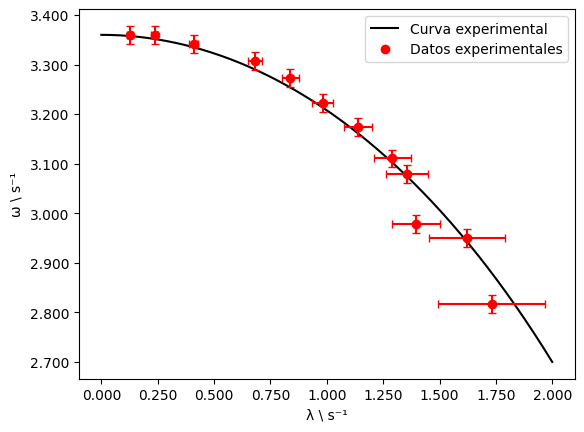

In [353]:
x = np.linspace(0, 2)
y = (omega0**2 - x**2)**0.5

fig = plt.figure()
plt.plot(x, y, label="Curva experimental", color="black")
plt.plot(lambda_exp, omega, "o", label="Datos experimentales", color="red")
plt.legend()
plt.errorbar(lambda_exp, omega, xerr=Dlambda_exp, ls="none", color="red", barsabove=True, capsize=3)
plt.errorbar(lambda_exp, omega, yerr=0.018, ls="none", color="red", barsabove=True, capsize=3)
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.3f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.3f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel("λ \\ s⁻¹")
plt.ylabel("ω \\ s⁻¹")
plt.show()
# fig.savefig('Fotos/oscilaciones_libres.png')

# Oscilaciones forzadas

In [367]:
theta_max_no_radianes = np.array([1,1.2,1.4,1.8,2.8,3.2,5.4,5,7.6,6,5.6,5.0,2.4,1.6,1,1])
theta_min_no_radianes = np.array([0.2,0.4,0.6,1.2,1.8,2.2,3.8,4,5.6,5.4,5,4.2,1.6,1,0.4,0.2])
thetaf_no_radianes = 15
theta0_no_radianes = 19
Dtheta_no_radianes = 0.2
T = [8.491,3.476,2.698,2.305,2.084,2.051,1.96,1.945,1.877,1.831,1.823,1.806,1.683,1.551,1.426, 1.333]
T0 = 1.867
DT = 0.01

T = np.array(list(round(x,2) for x in T))
T0 = round(T0,2)
print(f"T0: {round(float(T0),2)} ± {round(float(DT),2)}")

amplitud = ((theta_max_no_radianes + theta_min_no_radianes)*2*pi/50)/2
Damplitud = 2*pi/50*Dtheta_no_radianes

omega0 = 2*pi/T0
Domega0 = 2*pi/T0**2*DT
print(f"Omega0: {round(float(omega0),3)} ± {round(float(Domega0),3)}")

omega = 2*pi/T
thetaf = thetaf_no_radianes*2*pi/50
theta0 = theta0_no_radianes*2*pi/50
Dtheta = Dtheta_no_radianes*2*pi/50
lambda_t = float(1/T0*np.log(theta0/thetaf))
Dlambda_t = float(np.log(theta0/thetaf)/T0**2*DT + Dtheta/T0*(1/theta0 + 1/thetaf))
print(f"Lambda teórica: {round(float(lambda_t),3)} ± {round(float(Dlambda_t),3)}")

D_teorica = 0.061*omega0**2
DD_teorica = 2*0.061*omega0*Domega0
print(f"D teorica: {round(float(D_teorica),4)} ± {round(float(DD_teorica),4)}")

B_max_exp = max(amplitud)
B_interm_exp = B_max_exp/2**0.5

T0: 1.87 ± 0.01
Omega0: 3.36 ± 0.018
Lambda teórica: 0.126 ± 0.013
D teorica: 0.6887 ± 0.0074


In [355]:
y_max, x_max = sorted(zip(amplitud, omega))[::-1][0]
Dy, Dx = Damplitud, max(Domega)
B_lambda = 1/2**0.5*y_max
DB_lambda = 1/2**0.5*Dy

(x1, y1) = (3.206, 0.578)
(x2, y2) = (3.342, 0.829)
x_izq = (B_lambda - y1)*(x2-x1)/(y2-y1) + x1
Dx_izq = (x2-x1)/(y2-y1)*DB_lambda + (y2-B_lambda)/(y2-y1)*Dx + (B_lambda - y1)/(y2-y1)*Dx + (x2-x1)*(y2-B_lambda)/(y1-y2)**2*Dy + (x2-x1)*(B_lambda-y1)/(y1-y2)**2*Dy
print(f"Punto de corte por la izquierda: {round(float(x_izq),3)} ± {round(float(Dx_izq),3)}")

(x1, y1) = (3.471, 0.578)
(x2, y2) = (3.452, 0.666)
x_drh = (B_lambda - y1)*(x2-x1)/(y2-y1) + x1
Dx_drh = (x2-x1)/(y2-y1)*DB_lambda + (y2-B_lambda)/(y2-y1)*Dx + (B_lambda - y1)/(y2-y1)*Dx + (x2-x1)*(y2-B_lambda)/(y1-y2)**2*Dy + (x2-x1)*(B_lambda-y1)/(y1-y2)**2*Dy
print(f"Punto de corte por la derecha: {round(float(x_drh),4)} ± {round(float(Dx_drh),4)}")

lambda_exp = (x_drh-x_izq)/2
Dlambda_exp = (Dx_drh+Dx_izq)/2
print(f"Lambda experimental: {round(float(lambda_exp),4)} ± {round(float(Dlambda_exp),4)}")

D_exp = 2*omega0*lambda_exp*y_max
DD_exp = 2*lambda_exp*y_max*Domega0 + 2*omega0*y_max*Dlambda_exp + 2*omega0*lambda_exp*Dy
print(f"D experimental: {round(float(D_exp),2)} ± {round(float(DD_exp),2)}")

Punto de corte por la izquierda: 3.211 ± 0.041
Punto de corte por la derecha: 3.4692 ± 0.0087
Lambda experimental: 0.1293 ± 0.025
D experimental: 0.72 ± 0.16


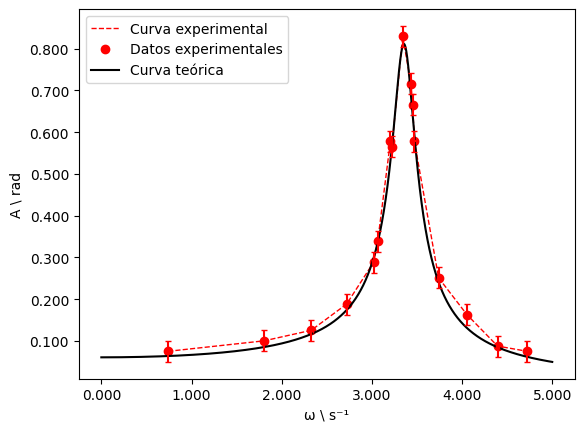

In [356]:
x = np.linspace(0,5, 100000)
y = D_teorica/((omega0**2-x**2)**2 + 4*lambda_t**2*x**2)**0.5

fig = plt.figure()
plt.plot(omega, amplitud, "--", label="Curva experimental", color="red", linewidth=1)
plt.plot(omega, amplitud, "o", label="Datos experimentales", color="red")
plt.plot(x, y, label="Curva teórica", color="black")
plt.legend()
plt.errorbar(omega, amplitud, xerr=0.018, ls="none", color="red", barsabove=True, capsize=2)
plt.errorbar(omega, amplitud, yerr=0.025, ls="none", color="red", barsabove=True, capsize=2)
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.3f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.3f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.xlabel("ω \\ s⁻¹")
plt.ylabel("A \\ rad")
plt.show()
# fig.savefig('Fotos/oscilaciones_forzadas.png')